In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [8]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("london_crime").getOrCreate()

In [9]:
spark

In [93]:
df = spark.read.format("csv").option("header", True).option('inferSchema',True).load("londom_crime.csv")

In [95]:
df.printSchema()
df.take(10)

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)



[Row(lsoa_code='E01001116', borough='Croydon', major_category='Burglary', minor_category='Burglary in Other Buildings', value=0, year=2016, month=11),
 Row(lsoa_code='E01001646', borough='Greenwich', major_category='Violence Against the Person', minor_category='Other violence', value=0, year=2016, month=11),
 Row(lsoa_code='E01000677', borough='Bromley', major_category='Violence Against the Person', minor_category='Other violence', value=0, year=2015, month=5),
 Row(lsoa_code='E01003774', borough='Redbridge', major_category='Burglary', minor_category='Burglary in Other Buildings', value=0, year=2016, month=3),
 Row(lsoa_code='E01004563', borough='Wandsworth', major_category='Robbery', minor_category='Personal Property', value=0, year=2008, month=6),
 Row(lsoa_code='E01001320', borough='Ealing', major_category='Theft and Handling', minor_category='Other Theft', value=0, year=2012, month=5),
 Row(lsoa_code='E01001342', borough='Ealing', major_category='Violence Against the Person', minor

In [96]:
df.count()

13490604

In [97]:
df.drop('NA')

DataFrame[lsoa_code: string, borough: string, major_category: string, minor_category: string, value: int, year: int, month: int]

In [98]:
df_new.count()


13490604

In [99]:
df = df_new.drop("lsoa_code")

In [100]:
df.take(10)

[Row(borough='Croydon', major_category='Burglary', minor_category='Burglary in Other Buildings', value='0', year='2016', month='11'),
 Row(borough='Greenwich', major_category='Violence Against the Person', minor_category='Other violence', value='0', year='2016', month='11'),
 Row(borough='Bromley', major_category='Violence Against the Person', minor_category='Other violence', value='0', year='2015', month='5'),
 Row(borough='Redbridge', major_category='Burglary', minor_category='Burglary in Other Buildings', value='0', year='2016', month='3'),
 Row(borough='Wandsworth', major_category='Robbery', minor_category='Personal Property', value='0', year='2008', month='6'),
 Row(borough='Ealing', major_category='Theft and Handling', minor_category='Other Theft', value='0', year='2012', month='5'),
 Row(borough='Ealing', major_category='Violence Against the Person', minor_category='Offensive Weapon', value='0', year='2010', month='7'),
 Row(borough='Hounslow', major_category='Robbery', minor_ca

In [101]:
totaleBorough = df.select('borough').distinct()
totaleBorough.show()

+--------------------+
|             borough|
+--------------------+
|             Croydon|
|          Wandsworth|
|              Bexley|
|             Lambeth|
|Barking and Dagenham|
|              Camden|
|           Greenwich|
|              Newham|
|       Tower Hamlets|
|            Hounslow|
|              Barnet|
|              Harrow|
|Kensington and Ch...|
|           Islington|
|               Brent|
|            Haringey|
|             Bromley|
|              Merton|
|         Westminster|
|             Hackney|
+--------------------+
only showing top 20 rows



In [102]:
totaleBorough.count()

33

In [103]:
hackeneydata = df.filter(df['borough']=='Hackney')
hackeneydata.count()

417744

In [104]:
yearfilterdf = df.filter((df['year'] == '2016') | (df['year'] == '2015'))
yearfilterdf.count()

2997912

In [105]:
#using isin operator
yearIsInfilterdf=df.filter((df['year']).isin(['2015','2016']))
yearIsInfilterdf.count()

2997912

In [106]:
df.filter(df['year'] >= 2014).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|              Sutton|  Theft and Handling|Theft/Taking of P...|    1|2016|    8|
|             Lambeth|Violence Against ...|      Other violence|    0|2015|    4|
|Richmond upon Thames|             Robbery|   Personal Property|    0|2014|    1|
|          Hillingdon|  Theft and Handling|Theft/Taking Of M...|    0|2016|    2|
|Kingston upon Thames|  Theft and Handling|    Theft From Shops|    0|2016|   11|
|            Har

In [107]:
## performing aggregation on data
#group all convictions by borough
df.groupBy('borough').count().show()

+--------------------+------+
|             borough| count|
+--------------------+------+
|             Croydon|602100|
|          Wandsworth|498636|
|              Bexley|385668|
|             Lambeth|519048|
|Barking and Dagenham|311040|
|              Camden|378432|
|           Greenwich|421200|
|              Newham|471420|
|       Tower Hamlets|412128|
|            Hounslow|395928|
|              Barnet|572832|
|              Harrow|365688|
|Kensington and Ch...|296784|
|           Islington|359208|
|               Brent|490644|
|            Haringey|413856|
|             Bromley|523908|
|              Merton|339876|
|         Westminster|366660|
|             Hackney|417744|
+--------------------+------+
only showing top 20 rows



In [108]:
boroughValueSum = df.groupBy('borough').agg({'value':'sum'})
boroughValueSum = df.groupBy('borough').agg({'value':'sum'}).withColumnRenamed('sum(value)','conviction')
boroughValueSum.show()

+--------------------+----------+
|             borough|conviction|
+--------------------+----------+
|             Croydon|  260294.0|
|          Wandsworth|  204741.0|
|              Bexley|  114136.0|
|             Lambeth|  292178.0|
|Barking and Dagenham|  149447.0|
|              Camden|  275147.0|
|           Greenwich|  181568.0|
|              Newham|  262024.0|
|       Tower Hamlets|  228613.0|
|            Hounslow|  186772.0|
|              Barnet|  212191.0|
|              Harrow|  116848.0|
|Kensington and Ch...|  171981.0|
|           Islington|  230286.0|
|               Brent|  227551.0|
|            Haringey|  213272.0|
|             Bromley|  184349.0|
|              Merton|  115654.0|
|         Westminster|  455028.0|
|             Hackney|  217119.0|
+--------------------+----------+
only showing top 20 rows



In [109]:
totalconviction = boroughValueSum.agg({'conviction':'sum'})

In [110]:
totalconviction.show()


+---------------+
|sum(conviction)|
+---------------+
|      6447758.0|
+---------------+



In [111]:
totalconcivtionno=totalconviction.collect()[0][0]

In [112]:
totalconcivtionno


6447758.0

In [117]:
#find % of conviction on per borough basis
processeddf = boroughValueSum.withColumn('percent',(boroughValueSum.conviction/totalconcivtionno)*100)
processeddf.orderBy(processeddf[2].desc()).show()


+--------------------+----------+------------------+
|             borough|conviction|           percent|
+--------------------+----------+------------------+
|         Westminster|  455028.0|7.0571507181255875|
|             Lambeth|  292178.0| 4.531466596606138|
|           Southwark|  278809.0| 4.324123206857329|
|              Camden|  275147.0| 4.267328271315394|
|              Newham|  262024.0| 4.063800161234339|
|             Croydon|  260294.0| 4.036969129424523|
|              Ealing|  251562.0|3.9015422104861877|
|           Islington|  230286.0|3.5715670470262686|
|       Tower Hamlets|  228613.0|3.5456200434321508|
|               Brent|  227551.0| 3.529149201939651|
|             Hackney|  217119.0|3.3673565291997622|
|            Lewisham|  215137.0|3.3366171621205387|
|            Haringey|  213272.0|  3.30769237927354|
|              Barnet|  212191.0|  3.29092686170914|
|          Hillingdon|  209680.0|3.2519830924175506|
|          Wandsworth|  204741.0| 3.1753828229

In [118]:
df.take(10)

[Row(borough='Croydon', major_category='Burglary', minor_category='Burglary in Other Buildings', value='0', year='2016', month='11'),
 Row(borough='Greenwich', major_category='Violence Against the Person', minor_category='Other violence', value='0', year='2016', month='11'),
 Row(borough='Bromley', major_category='Violence Against the Person', minor_category='Other violence', value='0', year='2015', month='5'),
 Row(borough='Redbridge', major_category='Burglary', minor_category='Burglary in Other Buildings', value='0', year='2016', month='3'),
 Row(borough='Wandsworth', major_category='Robbery', minor_category='Personal Property', value='0', year='2008', month='6'),
 Row(borough='Ealing', major_category='Theft and Handling', minor_category='Other Theft', value='0', year='2012', month='5'),
 Row(borough='Ealing', major_category='Violence Against the Person', minor_category='Offensive Weapon', value='0', year='2010', month='7'),
 Row(borough='Hounslow', major_category='Robbery', minor_ca

In [122]:
monthlyGroupeddf = df.filter(df['year'] == 2014).groupBy(df['month']).agg({'value':'sum'}).withColumnRenamed('sum(value)','total')

In [129]:
totalcovictions = monthlyGroupeddf.agg({'total':'sum'}).collect()[0][0]

In [130]:
totalcovictions


680183.0

In [132]:
monthlyGroupeddf.withColumn('percent',(monthlyGroupeddf.total/totalcovictions)*100).show()

+-----+-------+-----------------+
|month|  total|          percent|
+-----+-------+-----------------+
|    7|58564.0|8.610035828593187|
|   11|59704.0|8.777637782773166|
|    3|57669.0|  8.4784535926361|
|    8|55641.0|  8.1802985373054|
|    5|56327.0|8.281153748329494|
|    6|57039.0|8.385831460062953|
|    9|56933.0|8.370247418709377|
|    1|55515.0|8.161774110790772|
|   10|60537.0|8.900104824730992|
|    4|53467.0|7.860678670299022|
|   12|57565.0|8.463163589798627|
|    2|51222.0|7.530620435970908|
+-----+-------+-----------------+



In [137]:
import pyspark.sql.functions as func

In [149]:
updateddf = monthlyGroupeddf.withColumn('percent',func.round((monthlyGroupeddf.total/totalcovictions)*100,2))
updateddf.printSchema()
updateddf.show()

root
 |-- month: string (nullable = true)
 |-- total: double (nullable = true)
 |-- percent: double (nullable = true)

+-----+-------+-------+
|month|  total|percent|
+-----+-------+-------+
|    7|58564.0|   8.61|
|   11|59704.0|   8.78|
|    3|57669.0|   8.48|
|    8|55641.0|   8.18|
|    5|56327.0|   8.28|
|    6|57039.0|   8.39|
|    9|56933.0|   8.37|
|    1|55515.0|   8.16|
|   10|60537.0|    8.9|
|    4|53467.0|   7.86|
|   12|57565.0|   8.46|
|    2|51222.0|   7.53|
+-----+-------+-------+



In [150]:
#other aggregations
## convictions based on category in london
df.show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|          Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
|              Ealing|  Theft and Handling|         Other Theft|    0|2012|    5|
|              Ealing|Violence Against ...|    Offensive Weapon|    0|2010|    7|
|            Hounslow|             Robbery|   Personal Property|    0|2013|    4|
|              Newham|     Criminal Damage|Criminal Damage T...|    0|2013|    9|
|              S

In [156]:
df.groupBy('major_category').agg({'value':'sum'}).withColumnRenamed('sum(value)','totalValue').orderBy('totalValue').show()

+--------------------+----------+
|      major_category|totalValue|
+--------------------+----------+
|     Sexual Offences|    1273.0|
|    Fraud or Forgery|    5325.0|
|Other Notifiable ...|  106349.0|
|             Robbery|  258873.0|
|               Drugs|  470765.0|
|     Criminal Damage|  630938.0|
|            Burglary|  754293.0|
|Violence Against ...| 1558081.0|
|  Theft and Handling| 2661861.0|
+--------------------+----------+



In [159]:
#use of min and max aggregations
df_year = df.select('year')
df_year.agg({'year':'min'}).show()
df_year.agg({'year':'max'}).show()

+---------+
|min(year)|
+---------+
|     2008|
+---------+

+---------+
|max(year)|
+---------+
|     2016|
+---------+



In [161]:
df_year.describe().show()

+-------+-----------------+
|summary|             year|
+-------+-----------------+
|  count|         13490604|
|   mean|           2012.0|
| stddev|2.581988993167432|
|    min|             2008|
|    max|             2016|
+-------+-----------------+



In [163]:
df.crosstab('borough','major_category').show()

+----------------------+--------+---------------+-----+----------------+-------------------------+-------+---------------+------------------+---------------------------+
|borough_major_category|Burglary|Criminal Damage|Drugs|Fraud or Forgery|Other Notifiable Offences|Robbery|Sexual Offences|Theft and Handling|Violence Against the Person|
+----------------------+--------+---------------+-----+----------------+-------------------------+-------+---------------+------------------+---------------------------+
|              Havering|   32400|          64152|32616|            5508|                    21060|  27648|           1944|            118800|                      95472|
|                Merton|   26784|          52920|29160|            5724|                    19440|  23652|           2592|            101196|                      78408|
|              Haringey|   31320|          62424|35424|           10368|                    23760|  29484|           3780|            120420|         

In [164]:
df.crosstab('borough','major_category').select('borough_major_category','Burglary','Fraud or Forgery','Robbery').show()

+----------------------+--------+----------------+-------+
|borough_major_category|Burglary|Fraud or Forgery|Robbery|
+----------------------+--------+----------------+-------+
|              Havering|   32400|            5508|  27648|
|                Merton|   26784|            5724|  23652|
|              Haringey|   31320|           10368|  29484|
|         Tower Hamlets|   31104|            5400|  28512|
|               Bromley|   42552|            8532|  34668|
|               Enfield|   39528|            9720|  35532|
|  Kingston upon Thames|   21168|            3780|  15660|
|           Westminster|   27648|            8748|  25056|
|  Richmond upon Thames|   24840|            2808|  18468|
|              Lewisham|   36504|           11016|  34884|
|                 Brent|   37368|            9288|  34128|
|  Barking and Dagenham|   23760|            7236|  22248|
|             Redbridge|   34776|            8532|  32400|
|             Islington|   26568|            5184|  2624

In [166]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [179]:
def describe_year(year):
    filtereddf = df.filter(df['year'] == year).agg({'value':'sum'}).withColumnRenamed('sum(value)','convictions')
    burough_list = [x[0] for x in filtereddf.toLocalIterator()]
    conviction_list = [x[1] for x in filtereddf.toLocalIterator() ]
   
    plt.title('Crime for the year:'+year,frontsize=30)
    plt.xlable('Boroughs',fontsize=30)
    plt.ylable('Convictions',fontsize=30)

    plt.xtics(rotation=90,frontsize=30)
    plt.ytics(frontsize=30)
    plt.autoscale()
    
    plt.figure(figsize=(33,10))
    plt.bar(burough_list,conviction_list)
    plt.xtic
    plt.show()
    
     
    


In [197]:
def describe_year(year):
    filtereddf = df.filter(df['year'] == year).groupBy('borough').agg({'value':'sum'}).withColumnRenamed('sum(value)','convictions')
    burough_list = [x[0] for x in filtereddf.toLocalIterator()]
    conviction_list = [x[1] for x in filtereddf.toLocalIterator() ]
    
    plt.title('Crime for the year:'+year,frontsize=30)
    plt.xlable('Boroughs',fontsize=30)
    plt.ylable('Convictions',fontsize=30)

    plt.xtics(rotation=90,fontsize=30)
    plt.ytics(frontsize=30)
    plt.autoscale()
    
    plt.figure(figsize=(33,10))
    plt.bar(burough_list,conviction_list)
    plt.xtic
    plt.show()
   
   

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|    27357.0|
|          Wandsworth|    21364.0|
|              Bexley|    11844.0|
|             Lambeth|    31765.0|
|Barking and Dagenham|    15426.0|
|              Camden|    27198.0|
|           Greenwich|    19894.0|
|              Newham|    28005.0|
|       Tower Hamlets|    25504.0|
|              Barnet|    22572.0|
|            Hounslow|    20005.0|
|              Harrow|    11909.0|
|Kensington and Ch...|    17840.0|
|           Islington|    24679.0|
|               Brent|    24426.0|
|            Haringey|    22773.0|
|             Bromley|    19668.0|
|              Merton|    11596.0|
|         Westminster|    47564.0|
|           Southwark|    28912.0|
+--------------------+-----------+
only showing top 20 rows



AttributeError: Unknown property frontsize

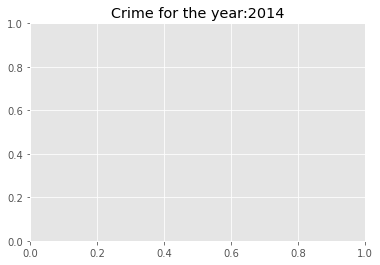

In [199]:
describe_year('2014')